**Level 3 – Task 3: NLP – Sentiment Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


In [2]:
pip install textblob


Import the Dataset

In [4]:
df = pd.read_csv("Sentiment dataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


Basic Text Cleaning

In [8]:
df['Text'] = df['Text'].astype(str).str.lower()
df['Text'].head()

,Text
0,enjoying a beautiful day at the park! ...
1,traffic was terrible this morning. ...
2,just finished an amazing workout! 💪 ...
3,excited about the upcoming weekend getaway! ...
4,trying out a new recipe for dinner tonight. ...


Sentiment Analysis Function

In [9]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


Apply Sentiment Analysis

In [11]:
df['Sentiment'] = df['Text'].apply(get_sentiment)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,trying out a new recipe for dinner tonight. ...,Positive,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Sentiment Distribution

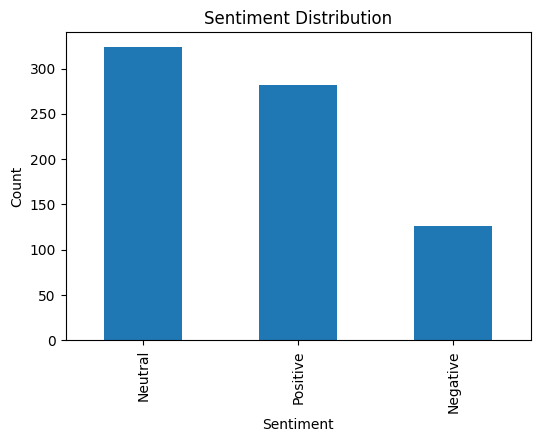

In [12]:
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Show Example Texts

In [14]:
df[['Text', 'Sentiment']].sample(5)

,Text,Sentiment
388,euphoria floods in as the final puzzle piece c...,Neutral
13,"new year, new fitness goals! 💪 ...",Positive
612,"exploring the art of meditation, finding tranq...",Neutral
165,loneliness creeps in as the night grows colde...,Neutral
716,collaborating on a group project to promote te...,Positive


### Observations
- The dataset contains a mix of positive, negative, and neutral sentiments.
- TextBlob effectively assigns sentiment polarity based on contextual meaning of words.
- Neutral sentiments occur when polarity is close to zero.

### Conclusion
Sentiment analysis was successfully performed on textual data using TextBlob.
The results provide insights into overall sentiment distribution and public opinion trends.
